In [35]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [36]:
train_ids = pd.read_csv('train_semeval_parids-labels.csv')
test_ids = pd.read_csv('dev_semeval_parids-labels.csv')

train_ids = train_ids['par_id']
test_ids = test_ids['par_id']

Text(0, 0.5, 'count')

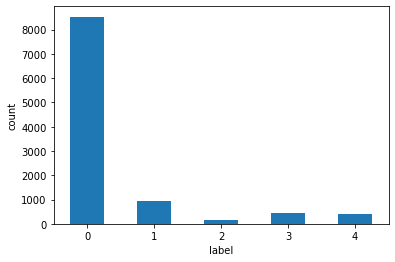

In [37]:
data = pd.read_csv('dontpatronizeme_pcl.tsv', sep='\t', header=None, names=['par_id', 'art_id', 'keyword', 'country_code', 'text', 'label'])

data.label.value_counts()
# plot the histogram for the discrete labels
plt.hist(data.label, bins=5, range=(0, 5), align='left', rwidth=0.5)
# set the x range to -0.5 to 4.5
plt.xlim(-0.5, 4.5)
plt.xlabel('label')
plt.ylabel('count')

In [38]:
data.head()

,par_id,art_id,keyword,country_code,text,label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0
2,3,@@16584954,immigrant,ie,White House press secretary Sean Spicer said t...,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0
4,5,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10469 entries, 0 to 10468
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   par_id        10469 non-null  int64 
 1   art_id        10469 non-null  object
 2   keyword       10469 non-null  object
 3   country_code  10469 non-null  object
 4   text          10468 non-null  object
 5   label         10469 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 490.9+ KB


In [40]:
print("label 0 accounts {}".format(data[data['label'] == 0]['label'].count() / data.shape[0]))

label 0 accounts 0.8146909924539115


In [41]:
# map labels to 0 and 1(Non-PCL and PCL)
data['label'] = data['label'].apply(lambda x: 0 if x == 0 or x == 1 else 1)

In [42]:
def plot_bar(data, attr):
    num_unique = data[attr].nunique()
    num_unique_range = np.arange(num_unique)
    zeros = data[data['label']==0]
    ones = data[data['label']==1]
    zero_keywords = zeros[attr].value_counts()
    one_keywords = ones[attr].value_counts()
    # make sure the order of the keywords are the same
    zero_keywords = zero_keywords.reindex(one_keywords.index)
    bar1 = plt.bar(x=num_unique_range, height=zero_keywords, width=0.5, color='b', alpha=1.0, align='center', label='Non-PCL')
    bar2 = plt.bar(x=[i  for i in num_unique_range], height=one_keywords, width=0.5, color='r', align='center', label='PCL', bottom=zero_keywords)
    plt.ylabel('count')
    plt.xticks([x for x in num_unique_range], zero_keywords.index, rotation=90)
    plt.legend()
    plt.show()

In [43]:
data.keyword.value_counts()

migrant          1089
in-need          1082
vulnerable       1080
homeless         1077
women            1070
refugee          1068
immigrant        1061
disabled         1028
hopeless         1005
poor-families     909
Name: keyword, dtype: int64

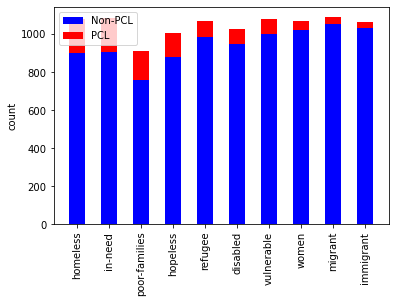

In [44]:
plot_bar(data, 'keyword')

In [45]:
data['country_code'].value_counts()

za    549
my    546
ph    545
pk    545
us    543
au    541
gb    540
ke    539
ie    537
ng    537
sg    535
in    530
ca    530
gh    523
nz    518
bd    512
lk    504
jm    490
hk    490
tz    415
Name: country_code, dtype: int64

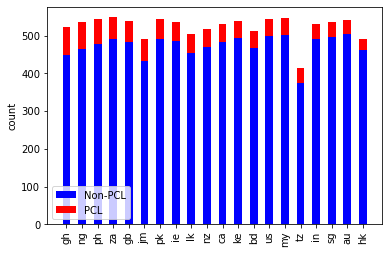

In [46]:
plot_bar(data, 'country_code')

In [47]:
# get the length of each sentence
data['text_len'] = data['text'].apply(lambda x: len(str(x).split()))
data['text_len'].describe()

count    10469.000000
mean        48.422581
std         29.091174
min          1.000000
25%         30.000000
50%         42.000000
75%         60.000000
max        909.000000
Name: text_len, dtype: float64

Text(0, 0.5, 'count')

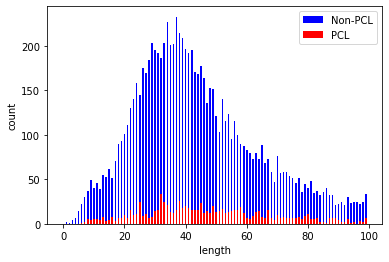

In [48]:
# plot the distribution of the length of the sentences
zeros = data[data['label']==0]['text_len']
ones = data[data['label']==1]['text_len']
plt.hist(zeros, bins=100, range=(0, 100), color='b', align='left', rwidth=0.5, label='Non-PCL')
plt.hist(ones, bins=100, range=(0, 100), color='r', align='left', rwidth=0.5, label='PCL')
plt.legend()
plt.xlabel('length')
plt.ylabel('count')

In [49]:
data.label.value_counts()

0    9476
1     993
Name: label, dtype: int64

In [50]:
data[data['label']==0]['label'].value_counts() / data.shape[0]

0    0.905149
Name: label, dtype: float64

Text(0, 0.5, 'count')

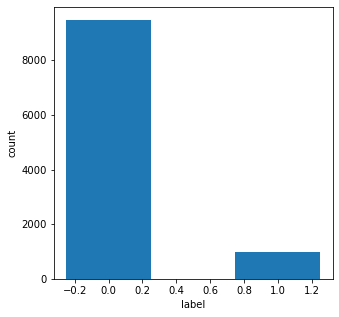

In [51]:
plt.figure(figsize=(5, 5))
plt.hist(data.label, bins=2, range=(0, 2), align='left', rwidth=0.5)
plt.xlabel('label')
plt.ylabel('count')

In [52]:
data = pd.read_csv('dontpatronizeme_pcl.tsv', sep='\t', header=None, names=['par_id', 'art_id', 'keyword', 'country_code', 'text', 'label'])

In [53]:
data = data.drop('art_id', axis=1)
data = data.drop('keyword', axis=1)
data = data.drop('country_code', axis=1)

train_data = data[data['par_id'].isin(train_ids)]
test_data = data[data['par_id'].isin(test_ids)].set_index('par_id').loc[test_ids].reset_index()

train_data = train_data.drop('par_id', axis=1)
test_data = test_data.drop('par_id', axis=1)

# fill the missing values with empty string

train_data = train_data.fillna('" "')
test_data = test_data.fillna('" "')

# split the validation set from the training set
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

In [54]:
# save the data
train_data.to_csv('./datasets/train_data.csv', index=False)
val_data.to_csv('./datasets/val_data.csv', index=False)
test_data.to_csv('./datasets/test_data.csv', index=False)

---

In [55]:
final_pred = pd.read_csv('task4_test.tsv', sep='\t', header=None, names=['par_id', 'art_id', 'keyword', 'country_code', 'text'])

In [56]:
# only keep the text column
final_pred = final_pred.drop(['par_id', 'art_id', 'keyword', 'country_code'], axis=1)
final_pred = final_pred.fillna('" "')

In [57]:
final_pred.to_csv('./datasets/final_pred.csv', index=False)

---

In [58]:
data = pd.read_csv('dontpatronizeme_pcl.tsv', sep='\t', header=None, names=['par_id', 'art_id', 'keyword', 'country_code', 'text', 'label'])
test_ids = pd.read_csv('dev_semeval_parids-labels.csv')
test_ids = test_ids['par_id']

test_data = data[data['par_id'].isin(test_ids)].set_index('par_id').loc[test_ids].reset_index()
test_data['original_label'] = test_data['label']
test_data['label'] = test_data['label'].apply(lambda x: 0 if x == 0 or x == 1 else 1)

In [59]:
# read the txt file named dev.txt and convert it to a dataframe
pred = pd.read_csv('dev.txt', sep='\t', header=None, names=['pred_label'])

In [60]:
# concatenate the prediction and the test data
dev = pd.concat([test_data, pred], axis=1)

In [61]:
# import the accuracy_score and f1 score function from sklearn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

accuracy for label 0: 0.931
f1 score for label 0: 0.964
accuracy for label 1: 0.649
f1 score for label 1: 0.787
accuracy for label 2: 0.389
f1 score for label 2: 0.56
accuracy for label 3: 0.719
f1 score for label 3: 0.837
accuracy for label 4: 0.848
f1 score for label 4: 0.918
[0.9313380281690141, 0.6492146596858639, 0.3888888888888889, 0.7191011235955056, 0.8478260869565217]
[0.9644484958979035, 0.7873015873015873, 0.56, 0.8366013071895425, 0.9176470588235294]


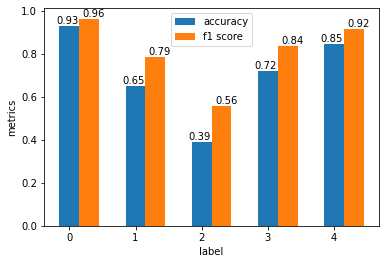

In [73]:
# To what extent is the model better at predicting examples with a higher level of patronising content?
accuracies = []
f1s = []
for i in range(5):
    temp = dev[dev['original_label']==i]
    if i == 0 or i == 1:
        pos_label = 0
    else:
        pos_label = 1
    # calculate the accuracy and f1 score for the examples with label i
    print("accuracy for label {}: {}".format(i, round(accuracy_score(temp['label'], temp['pred_label']), 3)))
    print("f1 score for label {}: {}".format(i, round(f1_score(temp['label'], temp['pred_label'], pos_label=pos_label), 3)))
    accuracies.append(accuracy_score(temp['label'], temp['pred_label']))
    f1s.append(f1_score(temp['label'], temp['pred_label'], pos_label=pos_label))
#plot the accuracy and f1 score for each label
plt.bar(range(5), accuracies,width=0.3,  label='accuracy')
print(accuracies)
print(f1s)
plt.bar([x + 0.3 for x in range(5) ], f1s, width=0.3, label='f1 score')
plt.xlabel('label')
plt.ylabel('metrics')
for i in range(5):
    plt.text(x=i-0.2, y=accuracies[i]+0.01, s=str(round(accuracies[i], 2)), size=10)
    plt.text(x=i+0.2, y=f1s[i]+0.01, s=str(round(f1s[i], 2)), size=10)
plt.legend()
plt.show()





In [ ]:
#  How does the length of the input sequence impact the model performance? If there is any difference, speculate why.
dev['text_len'] = dev['text'].apply(lambda x: len(str(x).split()))
for i in range(6):
    lengths = [x for x in range(i*15, (i+1)*15)]
    temp = dev[dev['text_len'].isin(lengths)]
    print("accuracy for length between {} and {}: {}".format(lengths[0], lengths[-1], round(accuracy_score(temp['label'], temp['pred_label']), 3)))
    print("f1 score for length between {} and {}: {}".format(lengths[0], lengths[-1], round(f1_score(temp['label'], temp['pred_label']), 3)))
    print('-------------------------------------')
    

accuracy for length between 0 and 14: 0.965
f1 score for length between 0 and 14: 0.8
-------------------------------------
accuracy for length between 15 and 29: 0.91
f1 score for length between 15 and 29: 0.494
-------------------------------------
accuracy for length between 30 and 44: 0.897
f1 score for length between 30 and 44: 0.568
-------------------------------------
accuracy for length between 45 and 59: 0.896
f1 score for length between 45 and 59: 0.542
-------------------------------------
accuracy for length between 60 and 74: 0.825
f1 score for length between 60 and 74: 0.487
-------------------------------------
accuracy for length between 75 and 89: 0.848
f1 score for length between 75 and 89: 0.627
-------------------------------------


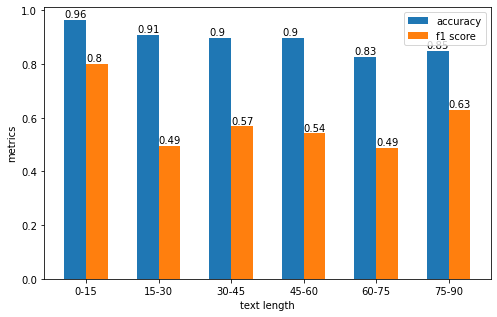

In [ ]:
# draw the bar chart for the accuracy and f1 score for each length

accuracies = []
f1s = []
for i in range(6):
    lengths = [x for x in range(i*15, (i+1)*15)]
    temp = dev[dev['text_len'].isin(lengths)]
    accuracies.append(accuracy_score(temp['label'], temp['pred_label']))
    f1s.append(f1_score(temp['label'], temp['pred_label']))

plt.figure(figsize=(8, 5))
bar1 = plt.bar([x for x in range(6)], accuracies, width=0.3, label='accuracy')
bar2 = plt.bar([x+0.3 for x in range(6)], f1s, width=0.3, label='f1 score')
plt.legend()
plt.xticks([x+0.15 for x in range(6)], ['0-15', '15-30', '30-45', '45-60', '60-75', '75-90'])
plt.xlabel('text length')
plt.ylabel('metrics')
h1 = [p.get_height() for p in bar1]
h2 = [p.get_height() for p in bar2]
for i in range(6):
    plt.text(i-0.15, h1[i]+0.01, str(round(h1[i], 2)))
    plt.text(i+0.15, h2[i]+0.01, str(round(h2[i], 2)))
plt.show()


In [ ]:
# To what extent does model performance depend on the data categories? E.g. Observations for homeless vs poor-families, etc.
keywords = dev['keyword'].unique()
accuracies = []
f1s = []
for keyword in keywords:
    temp = dev[dev['keyword']==keyword]
    print("accuracy for keyword {}: {}".format(keyword, round(accuracy_score(temp['label'], temp['pred_label']), 3)))
    print("f1 score for keyword {}: {}".format(keyword, round(f1_score(temp['label'], temp['pred_label']), 3)))
    print('-------------------------------------')



accuracy for keyword hopeless: 0.802
f1 score for keyword hopeless: 0.494
-------------------------------------
accuracy for keyword refugee: 0.915
f1 score for keyword refugee: 0.5
-------------------------------------
accuracy for keyword in-need: 0.881
f1 score for keyword in-need: 0.71
-------------------------------------
accuracy for keyword homeless: 0.807
f1 score for keyword homeless: 0.529
-------------------------------------
accuracy for keyword poor-families: 0.784
f1 score for keyword poor-families: 0.568
-------------------------------------
accuracy for keyword women: 0.948
f1 score for keyword women: 0.6
-------------------------------------
accuracy for keyword immigrant: 0.968
f1 score for keyword immigrant: 0.462
-------------------------------------
accuracy for keyword migrant: 0.981
f1 score for keyword migrant: 0.5
-------------------------------------
accuracy for keyword vulnerable: 0.904
f1 score for keyword vulnerable: 0.6
-----------------------------------

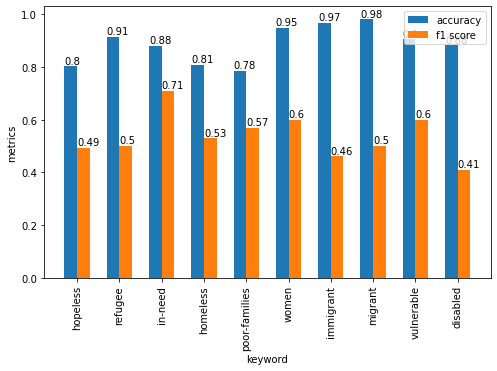

In [ ]:
# draw the bar chart for the accuracy and f1 score for each keyword

for keyword in keywords:
    temp = dev[dev['keyword']==keyword]
    accuracies.append(accuracy_score(temp['label'], temp['pred_label']))
    f1s.append(f1_score(temp['label'], temp['pred_label']))

plt.figure(figsize=(8, 5))
bar1 = plt.bar([x for x in range(len(keywords))], accuracies, width=0.3, label='accuracy')
bar2 = plt.bar([x+0.3 for x in range(len(keywords))], f1s, width=0.3, label='f1 score')
plt.legend()
# set the x axis text larger
plt.xticks([x+0.15 for x in range(len(keywords))], keywords, rotation=90)
plt.xlabel('keyword')
plt.ylabel('metrics')
h1 = [p.get_height() for p in bar1]
h2 = [p.get_height() for p in bar2]
for i in range(len(keywords)):
    plt.text(i-0.15, h1[i]+0.01, str(round(h1[i], 2)))
    plt.text(i+0.15, h2[i]+0.01, str(round(h2[i], 2)))
plt.show()